In [1]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans

from scipy.stats import zscore


In [3]:
#Read the Data set “country_stats.csv” and print the shape of the dataset
df = pd.read_csv("country_stats.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   country                               229 non-null    object 
 1   Region                                229 non-null    object 
 2   Surface area                          226 non-null    float64
 3   Population in thousands               229 non-null    int64  
 4   Population density                    229 non-null    float64
 5   GDP: Gross domestic product           208 non-null    float64
 6   Economy: Agriculture                  206 non-null    float64
 7   Economy: Industry                     208 non-null    float64
 8   Economy: Services and other activity  208 non-null    float64
 9   International trade: Balance          210 non-null    float64
 10  Health: Total expenditure             190 non-null    float64
 11  Education: Governme

In [4]:
df.shape

(229, 14)

In [6]:
#Print 5 points summary statistics of the data and share your observations

df.describe().T

#SOME HAVING MISSING VALUES  THE DATA ARE SO VARIED AND DIVERSE

,count,mean,std,min,25%,50%,75%,max
Surface area,226.0,593210.044248,1.796021e+06,0.00001,4306.500,83735.50,437693.500,17098246.0
Population in thousands,229.0,32756.794760,1.332751e+05,1.00000,431.000,5448.00,19193.000,1409517.0
Population density,229.0,462.824891,2.305384e+03,0.10000,35.900,88.10,222.800,25969.8
GDP: Gross domestic product,208.0,353896.341346,1.548160e+06,33.00000,4987.000,23871.00,174551.750,18036648.0
Economy: Agriculture,206.0,11.481553,1.210060e+01,0.00001,2.400,7.20,17.500,70.8
Economy: Industry,208.0,27.565385,1.312442e+01,4.00000,19.075,26.45,33.325,79.9
Economy: Services and other activity,208.0,61.089423,1.550489e+01,14.90000,51.000,61.30,72.100,94.0
International trade: Balance,210.0,-683.861905,7.318817e+04,-796494.00000,-3501.250,-984.00,49.250,530285.0
Health: Total expenditure,190.0,6.763158,2.798017e+00,1.50000,4.825,6.35,8.375,17.1
Education: Government expenditure,148.0,4.570946,1.781128e+00,1.00000,3.200,4.55,5.500,12.5


In [7]:
#Perform Univariate Analysis on the data and find out which country has more population

greator=0
for (a, b) in zip(df["country"], df["Population in thousands"]):
    if(b>greator):
        greator = b
    
print(greator)


for (a, b) in zip(df["country"], df["Population in thousands"]):
    if(b==1409517):
        print(a)


1409517
China



Perform bivariate and multivariate analysis and share your insights.


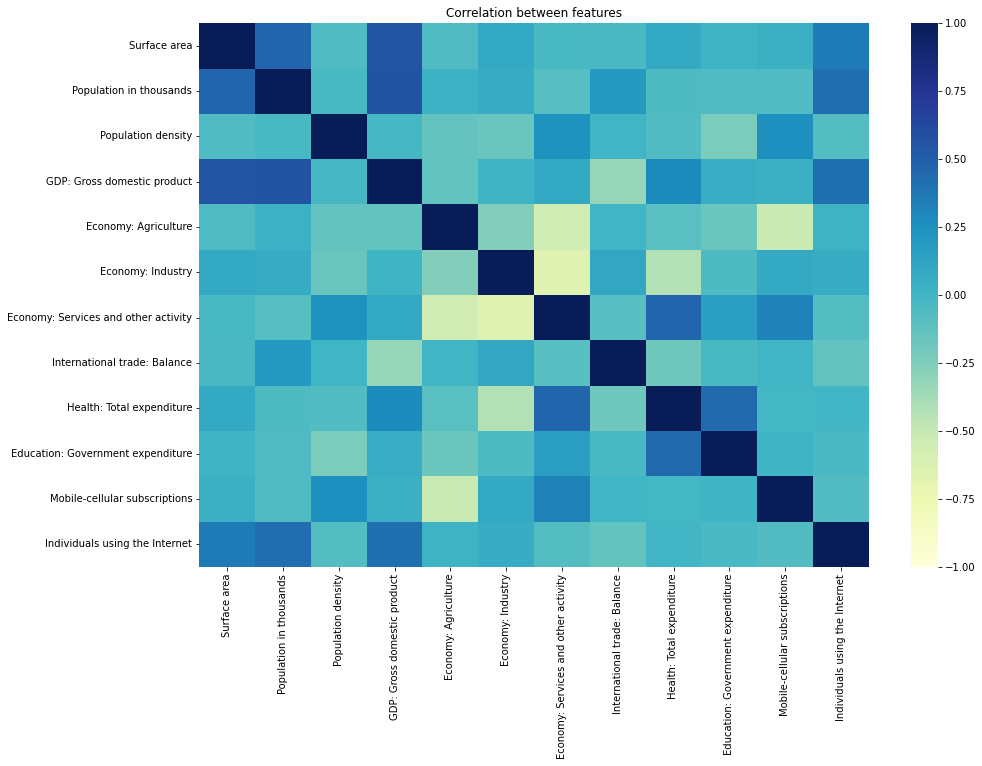

In [8]:
corr = df.corr() 
plt.figure(figsize=(15, 10))

# plotting the heat map
# corr: give the correlation matrix
# cmap: colour code used for plotting
# vmax: gives maximum range of values for the chart
# vmin: gives minimum range of values for the chart

sns.heatmap(corr, cmap='YlGnBu', vmax=1.0, vmin=-1.0)

# specify name of the plot
plt.title('Correlation between features')
plt.show()


# SURFACE AREA , POPULATION IN THOSAND, GDP, INDIVIDUALS USING INTERNET HAVE POSITIVE CORRELATION

#HEALTH IS POSIVTIVELY RELATED WITH ECONOMY SERVIES AND EDUCATION EXPENDITURE OF GOVERNMENT

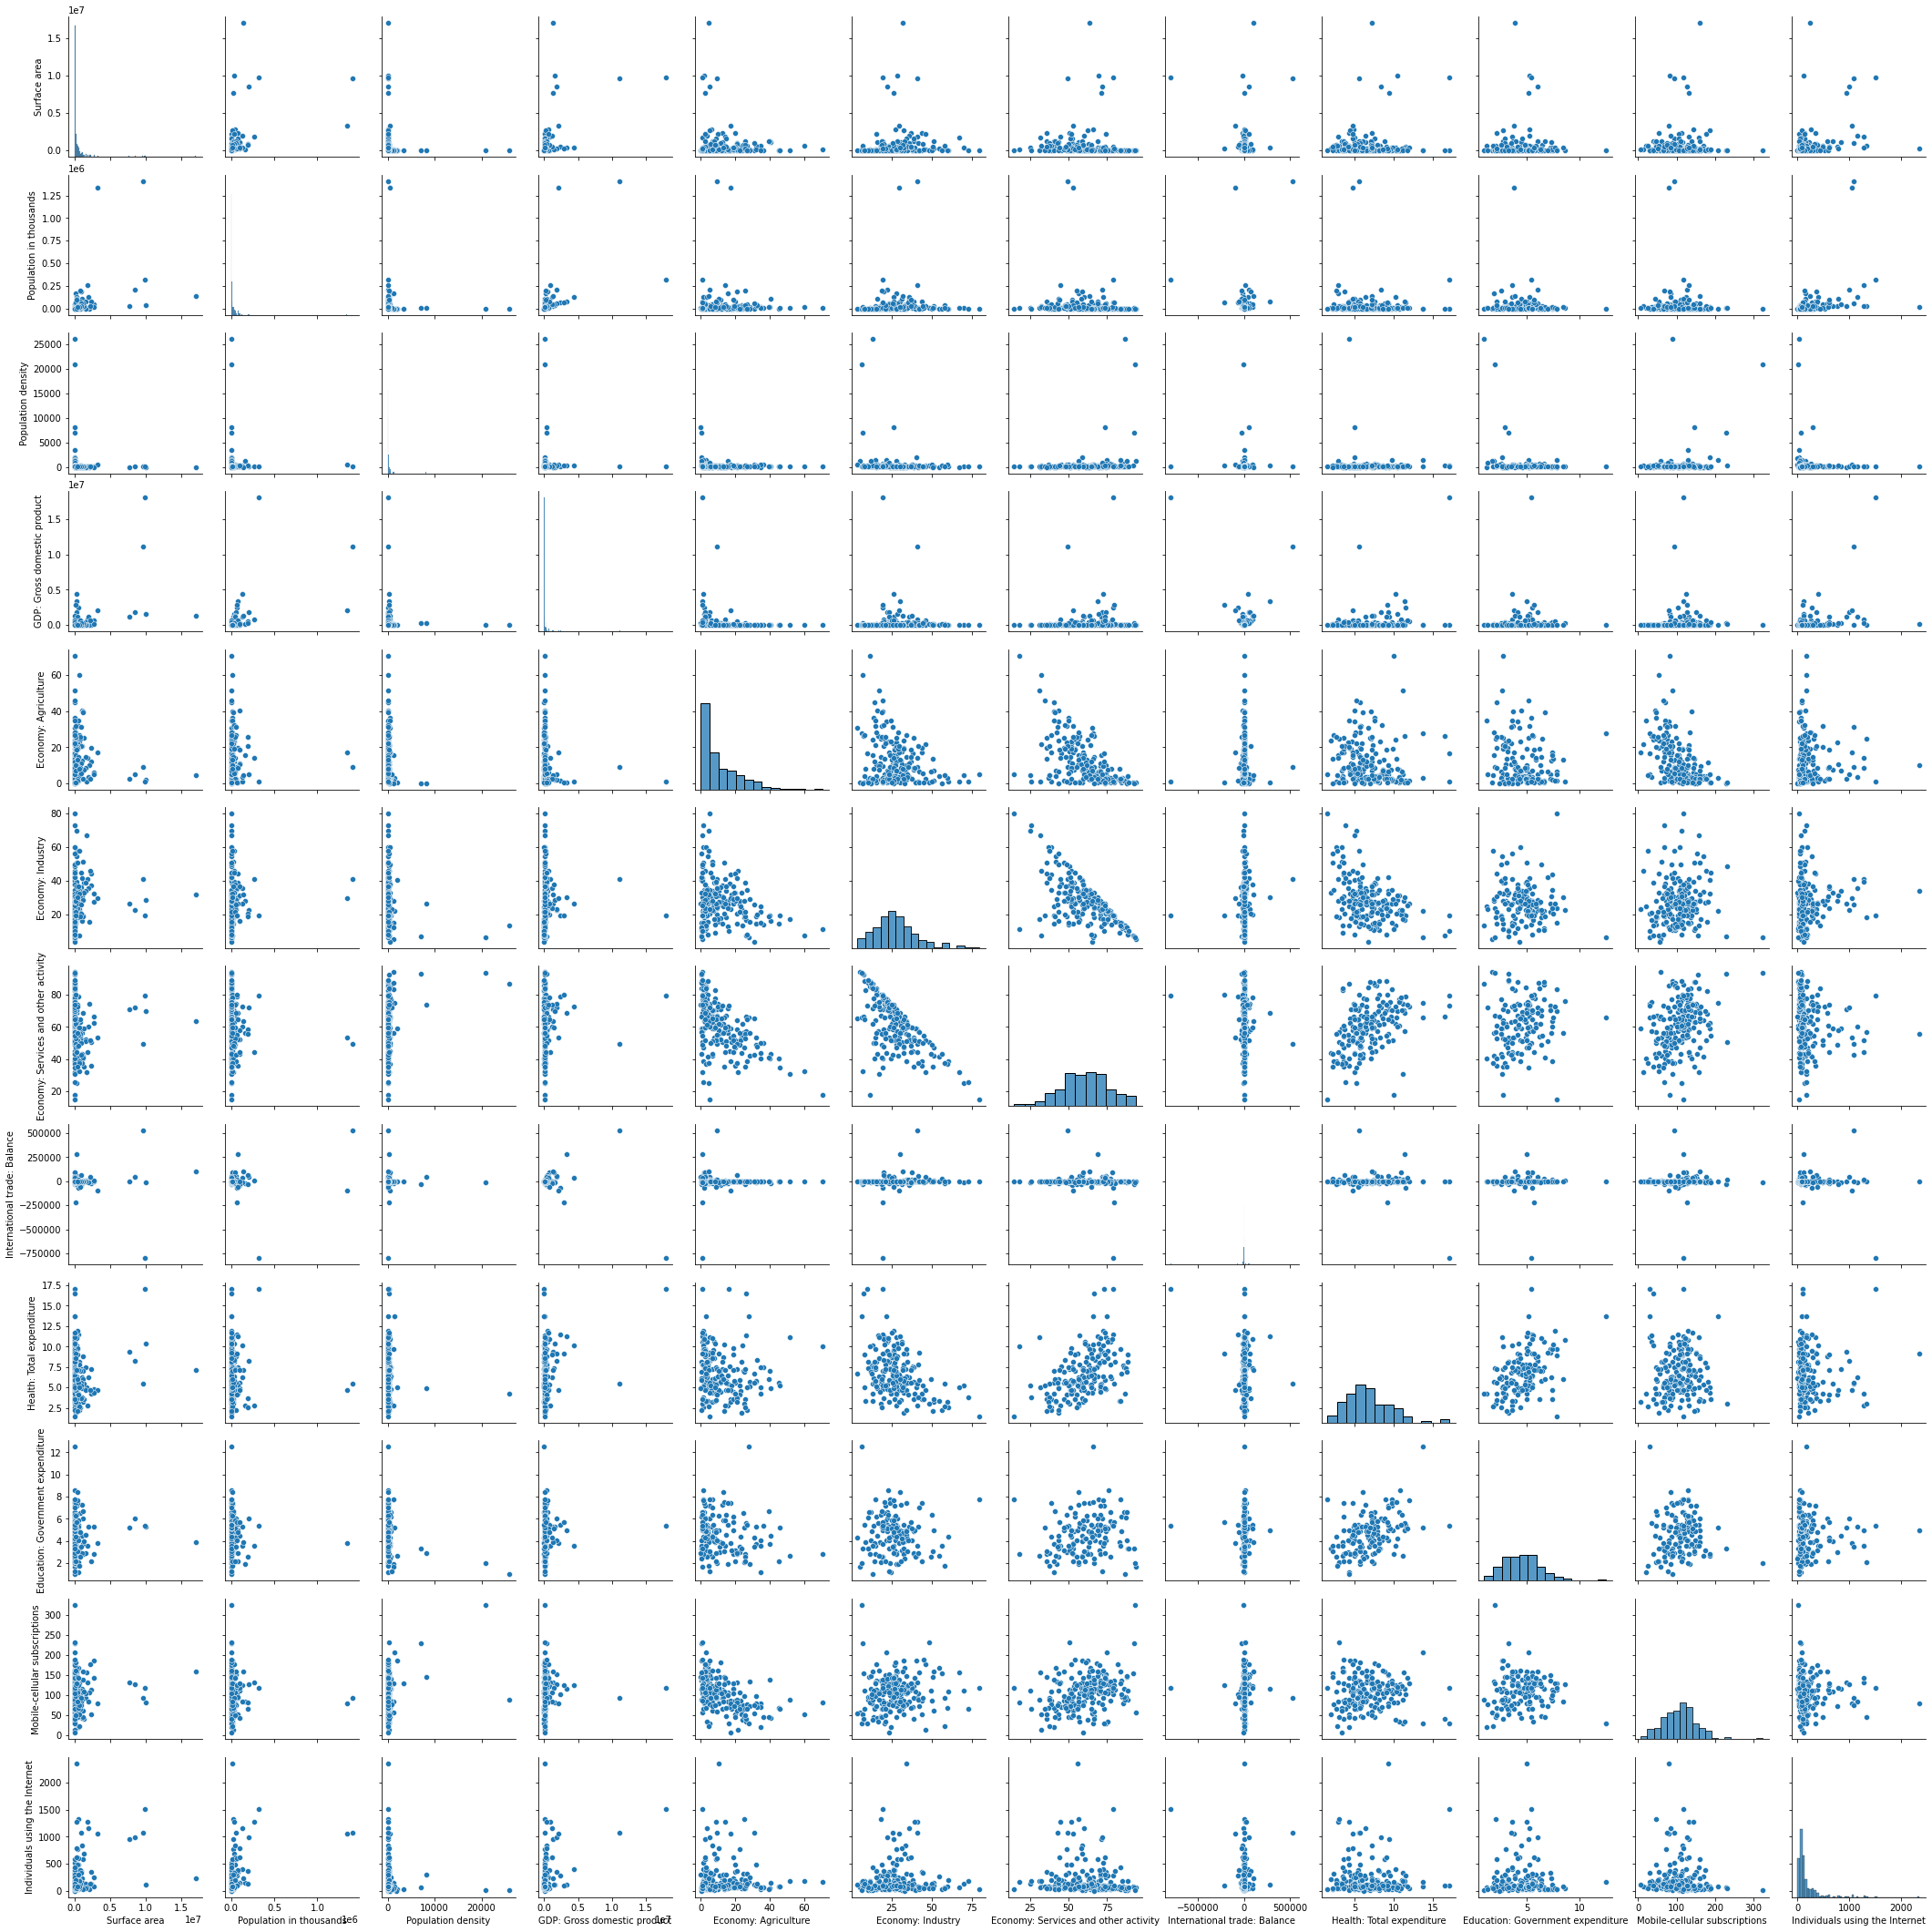

In [29]:
sns.pairplot(df)

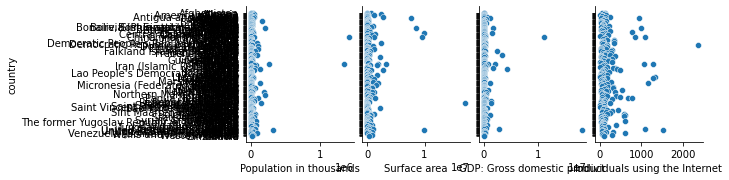

<Figure size 1440x1440 with 0 Axes>

In [17]:
sns.pairplot(df, y_vars='country', x_vars=['Population in thousands','Surface area','GDP: Gross domestic product','Individuals using the Internet'])
#sns.scatterplot(df['Economy: Services and other activity'], df['GDP: Gross domestic product'], hue=df['country'], palette='Set2',size=(30,30)) 
plt.figure(figsize=(20, 20))
plt.show()


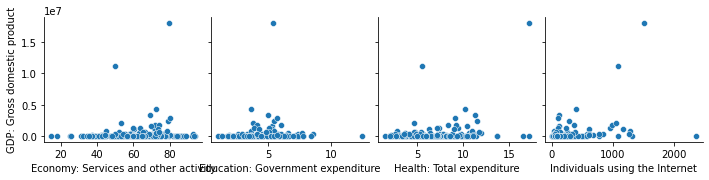

In [13]:
sns.pairplot(df, y_vars='GDP: Gross domestic product', x_vars=['Economy: Services and other activity','Education: Government expenditure','Health: Total expenditure','Individuals using the Internet'])




##DIAGRAM SHOWS THAT EVEN FOR LOW GDP  , ALLL 4 FACTORS ARE RELATED, WITH SOME EXCEPTIONS 
#ECONOMY SERVICES IS GOOD STARTS WELL FROM 30 , GOVN. EDUCATION TILL 8 IS GOOD , 
##HEALTH EXPENDITURE IS GOOD AMOUNT TILL 12, AND MOST OF THE INDUVIDUALS ARE USING THE INTERNET FROM LOW LEVEL TILL 12000

In [9]:
#Check if the data has any missing values, if any, impute those with suitable approach

df.isna().sum()


country                                  0
Region                                   0
Surface area                             3
Population in thousands                  0
Population density                       0
GDP: Gross domestic product             21
Economy: Agriculture                    23
Economy: Industry                       21
Economy: Services and other activity    21
International trade: Balance            19
Health: Total expenditure               39
Education: Government expenditure       81
Mobile-cellular subscriptions           20
Individuals using the Internet           1
dtype: int64

In [10]:
df= df.fillna(df.mean())

C:\Users\91866\AppData\Local\Temp\ipykernel_23716\297561253.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df= df.fillna(df.mean())


In [11]:
df.isna().sum()


country                                 0
Region                                  0
Surface area                            0
Population in thousands                 0
Population density                      0
GDP: Gross domestic product             0
Economy: Agriculture                    0
Economy: Industry                       0
Economy: Services and other activity    0
International trade: Balance            0
Health: Total expenditure               0
Education: Government expenditure       0
Mobile-cellular subscriptions           0
Individuals using the Internet          0
dtype: int64

In [12]:
df.drop(['Region','Surface area'], axis=1,inplace=True)


In [19]:
df

,country,Population in thousands,Population density,GDP: Gross domestic product,Economy: Agriculture,Economy: Industry,Economy: Services and other activity,International trade: Balance,Health: Total expenditure,Education: Government expenditure,Mobile-cellular subscriptions,Individuals using the Internet
0,Afghanistan,35530,54.4,20270.000000,23.300000,23.300000,53.300000,-2110.000000,8.200000,3.300000,61.600000,42.0
1,Albania,2930,106.9,11541.000000,22.400000,26.000000,51.700000,-2707.000000,5.900000,3.500000,106.400000,130.0
2,Algeria,41318,17.3,164779.000000,12.200000,37.300000,50.500000,-17099.000000,7.200000,4.570946,113.000000,135.0
3,American Samoa,56,278.2,353896.341346,11.481553,27.565385,61.089423,-683.861905,6.763158,4.570946,107.360287,92.0
4,Andorra,77,163.8,2812.000000,0.500000,10.800000,88.600000,-1255.000000,8.100000,3.300000,88.100000,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...
224,Wallis and Futuna Islands,12,84.1,353896.341346,11.481553,27.565385,61.089423,-51.000000,6.763158,4.570946,107.360287,89.0
225,Western Sahara,553,2.1,353896.341346,11.481553,27.565385,61.089423,-683.861905,6.763158,4.570946,107.360287,49.0
226,Yemen,28250,53.5,29688.000000,14.700000,36.900000,48.400000,-6291.000000,5.600000,4.570946,68.000000,298.0
227,Zambia,17094,23.0,21255.000000,8.200000,32.300000,59.500000,-937.000000,5.000000,4.570946,74.500000,88.0


In [21]:
TourDataX=df.iloc[:,1:]
TourDataX.head()

,Population in thousands,Population density,GDP: Gross domestic product,Economy: Agriculture,Economy: Industry,Economy: Services and other activity,International trade: Balance,Health: Total expenditure,Education: Government expenditure,Mobile-cellular subscriptions,Individuals using the Internet
0,35530,54.4,20270.000000,23.300000,23.300000,53.300000,-2110.000000,8.200000,3.300000,61.600000,42.0
1,2930,106.9,11541.000000,22.400000,26.000000,51.700000,-2707.000000,5.900000,3.500000,106.400000,130.0
2,41318,17.3,164779.000000,12.200000,37.300000,50.500000,-17099.000000,7.200000,4.570946,113.000000,135.0
3,56,278.2,353896.341346,11.481553,27.565385,61.089423,-683.861905,6.763158,4.570946,107.360287,92.0
4,77,163.8,2812.000000,0.500000,10.800000,88.600000,-1255.000000,8.100000,3.300000,88.100000,13.0


In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage
##Scale the data
from scipy.stats import zscore

TourDataX_Z = TourDataX.apply(zscore)

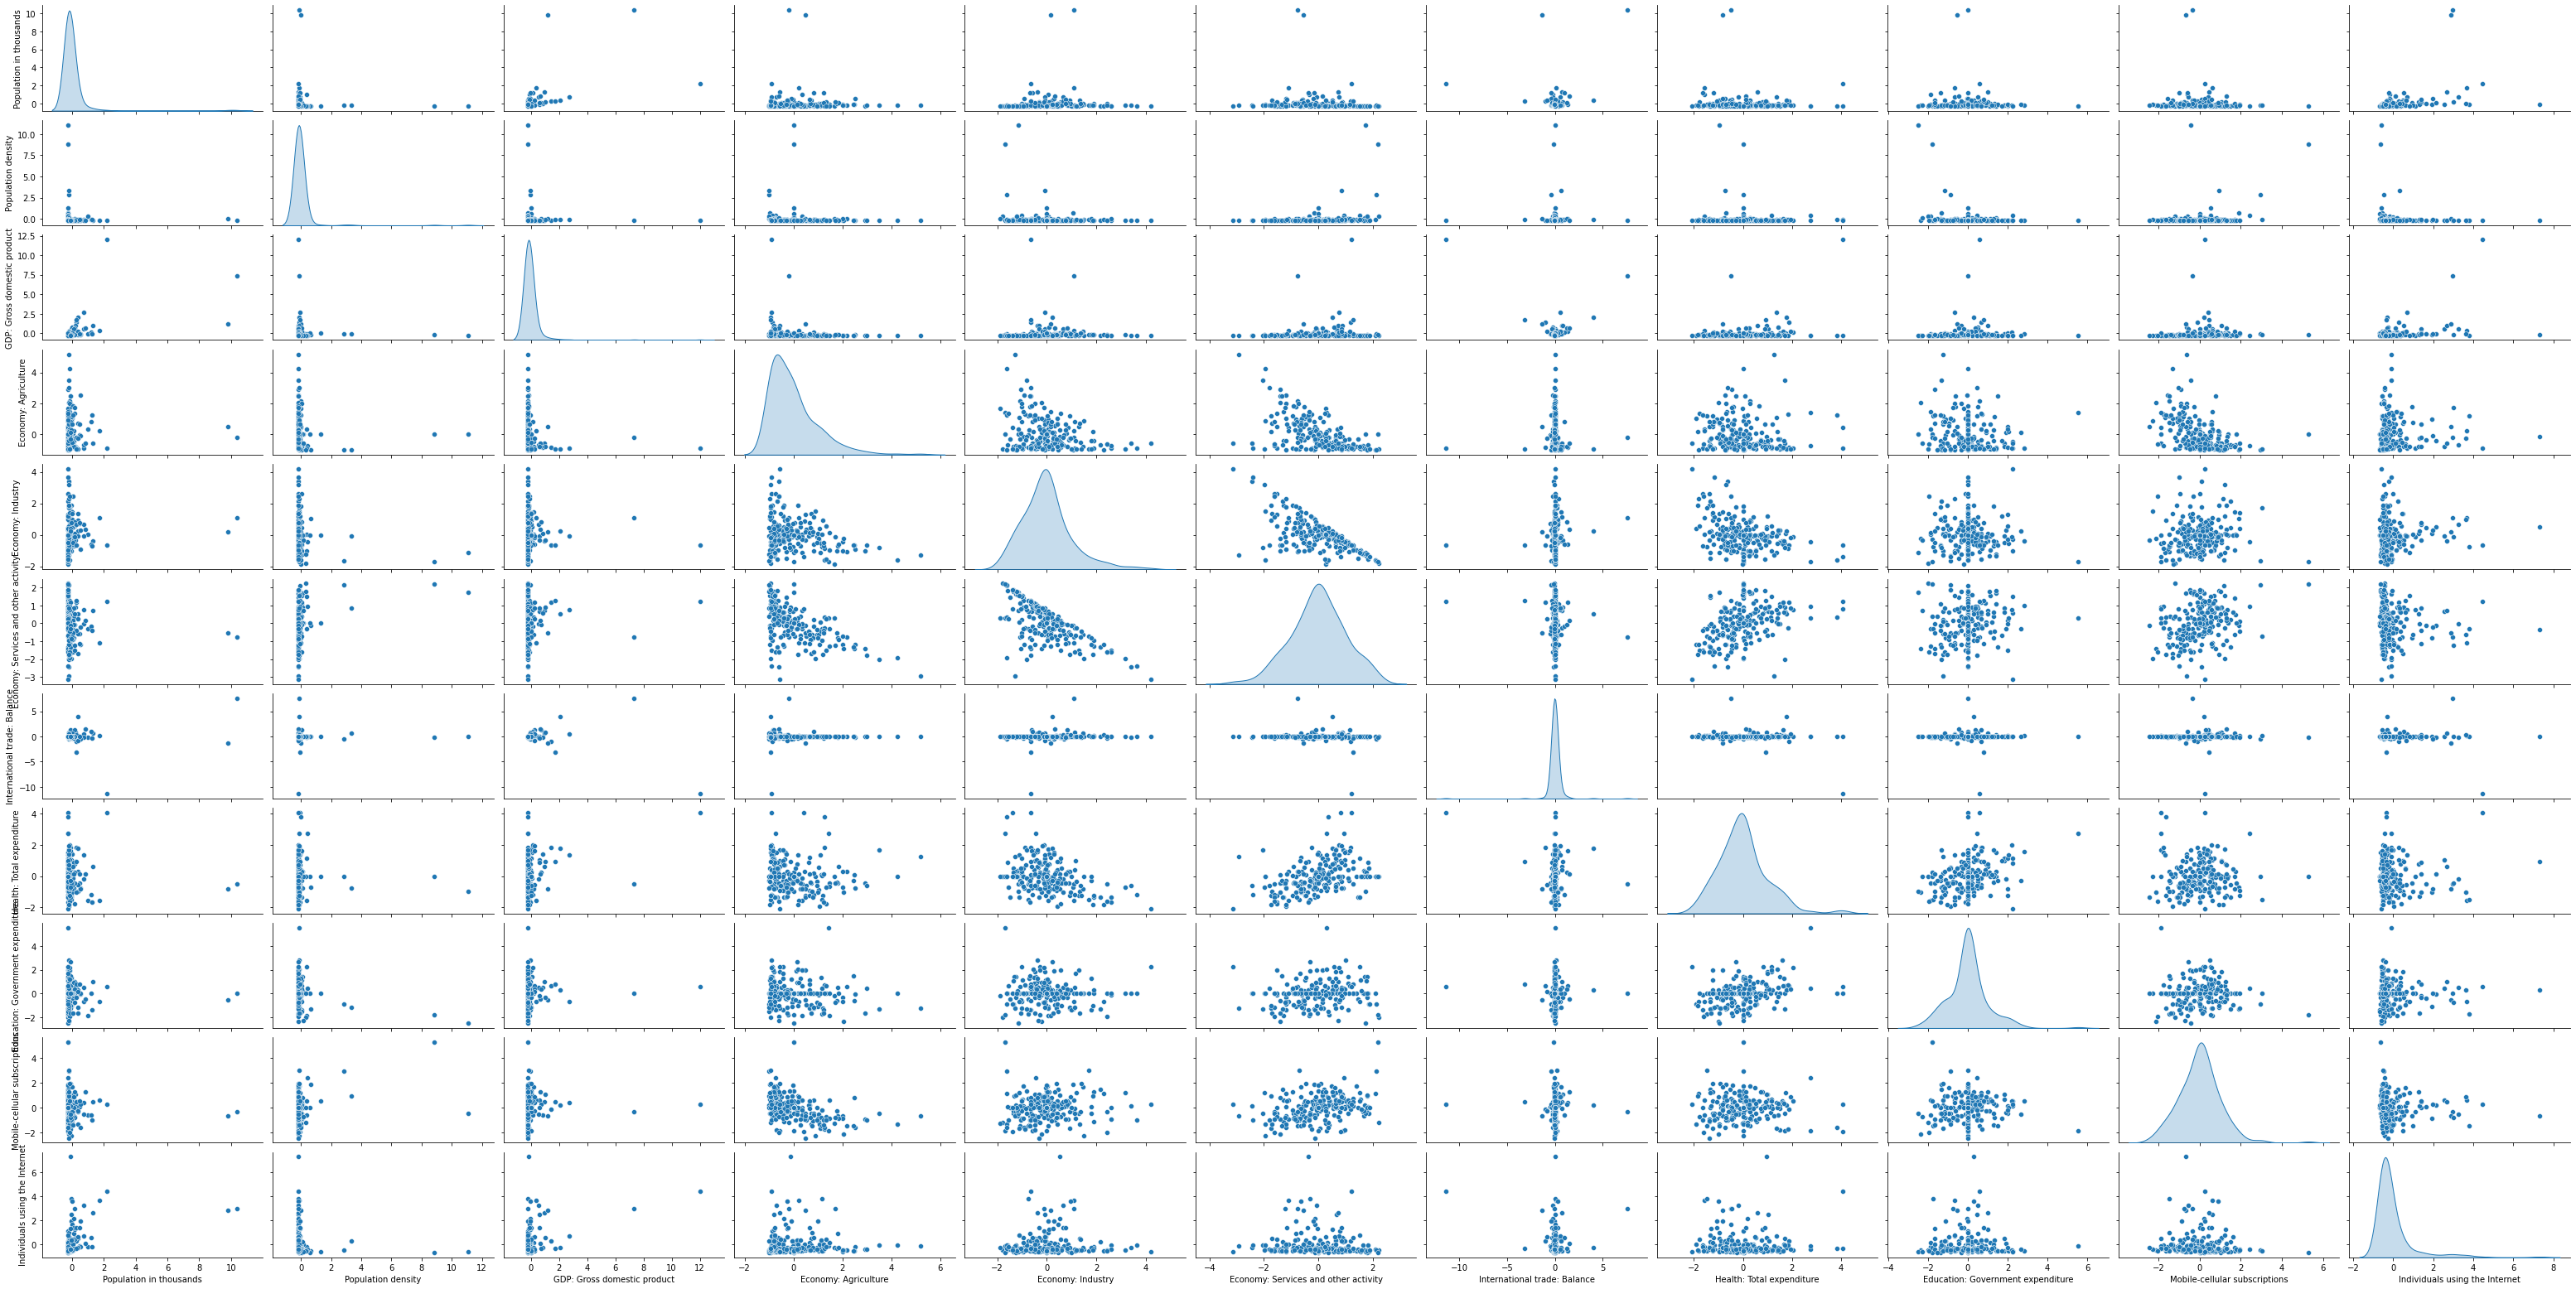

In [23]:
sns.pairplot(TourDataX_Z, height=2,aspect=2 , diag_kind='kde')

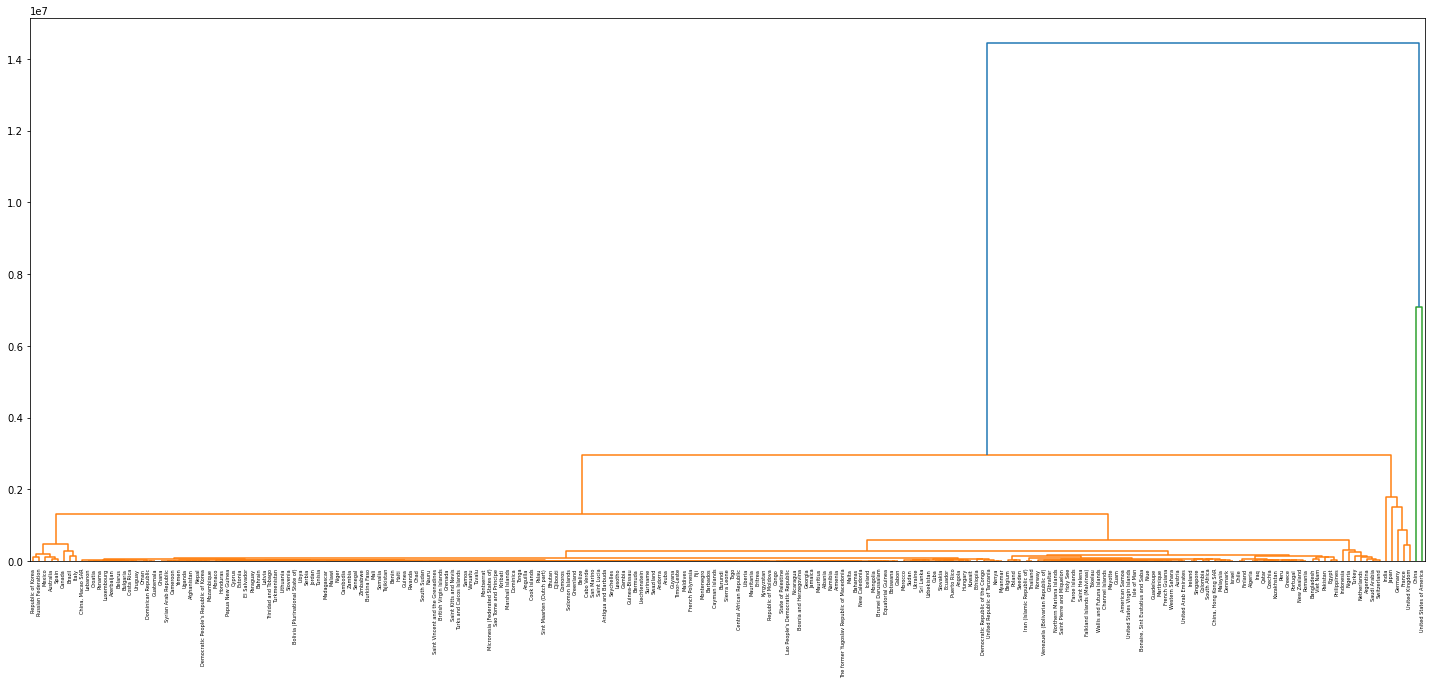

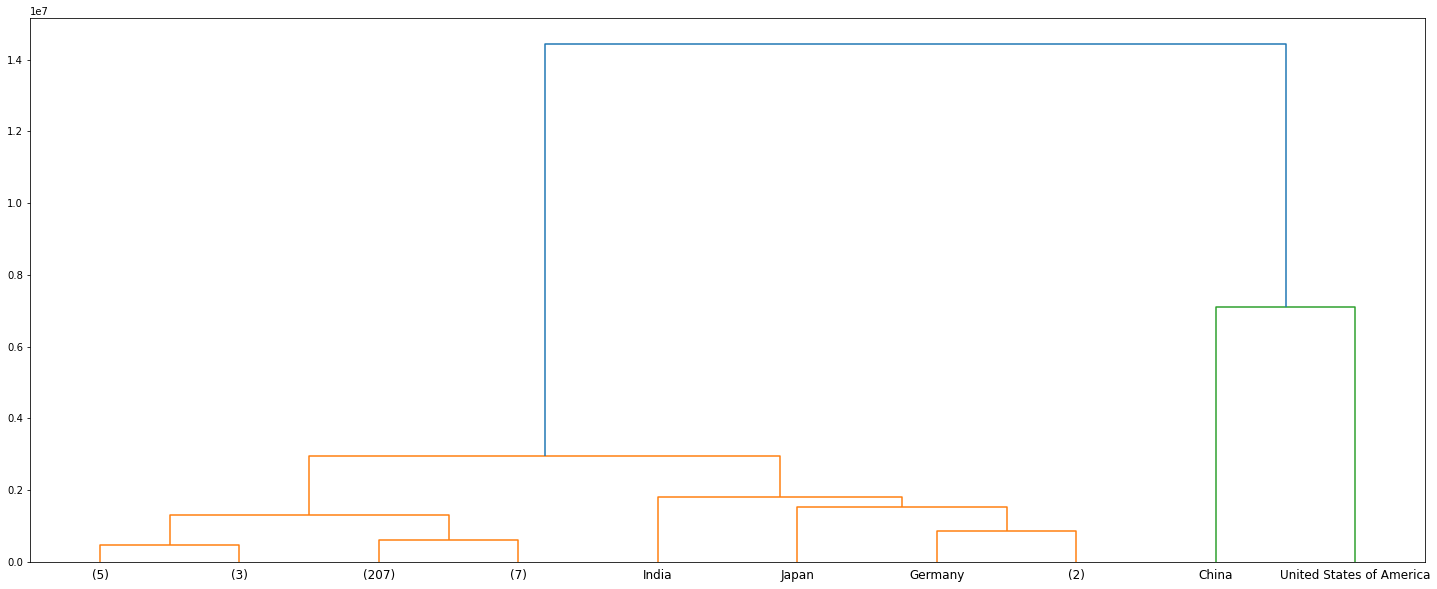

In [56]:

#Apply Hierarchical clustering to the scaled data

link_method = linkage(df.iloc[:,1:11], method = 'average')

labelList = np.array(df.country)
labelList
plt.figure(figsize=(25, 10))

dend = dendrogram(link_method,labels = labelList)
plt.figure(figsize=(25, 10))


dend = dendrogram(link_method,truncate_mode='lastp',p = 10,labels = labelList)



In [75]:
from scipy.cluster.hierarchy import fcluster

# Set criterion as maxclust,then create 3 clusters, and store the result in another object 'clusters'

clusters = fcluster(link_method, 5, criterion='maxclust')
clusters

df['clusters'] = clusters

df.head()



,country,Population in thousands,Population density,GDP: Gross domestic product,Economy: Agriculture,Economy: Industry,Economy: Services and other activity,International trade: Balance,Health: Total expenditure,Education: Government expenditure,Mobile-cellular subscriptions,Individuals using the Internet,clusters
0,Afghanistan,35530,54.4,20270.000000,23.300000,23.300000,53.300000,-2110.000000,8.200000,3.300000,61.600000,42.0,1
1,Albania,2930,106.9,11541.000000,22.400000,26.000000,51.700000,-2707.000000,5.900000,3.500000,106.400000,130.0,1
2,Algeria,41318,17.3,164779.000000,12.200000,37.300000,50.500000,-17099.000000,7.200000,4.570946,113.000000,135.0,1
3,American Samoa,56,278.2,353896.341346,11.481553,27.565385,61.089423,-683.861905,6.763158,4.570946,107.360287,92.0,1
4,Andorra,77,163.8,2812.000000,0.500000,10.800000,88.600000,-1255.000000,8.100000,3.300000,88.100000,13.0,1


In [76]:
df.clusters.value_counts().sort_index()




1    222
2      4
3      1
4      1
5      1
Name: clusters, dtype: int64

In [77]:
Clust = df.groupby(['clusters'])
Clust.mean()


,Population in thousands,Population density,GDP: Gross domestic product,Economy: Agriculture,Economy: Industry,Economy: Services and other activity,International trade: Balance,Health: Total expenditure,Education: Government expenditure,Mobile-cellular subscriptions,Individuals using the Internet
clusters,,,,,,,,,,,
1,1.841166e+04,470.15,1.653482e+05,11.702143,27.595374,60.843594,807.556864,6.663798,4.563854,107.323449,185.85143
2,8.519000e+04,244.40,3.255906e+06,1.050000,23.950000,75.000000,6676.250000,10.525000,4.950000,117.525000,225.00000
3,1.339180e+06,450.40,2.116239e+06,17.000000,29.700000,53.200000,-96378.000000,4.700000,3.800000,78.800000,1052.00000
4,1.409517e+06,150.10,1.115846e+07,9.200000,41.100000,49.700000,530285.000000,5.500000,4.570946,93.200000,1080.00000
5,3.244600e+05,35.50,1.803665e+07,1.000000,19.700000,79.300000,-796494.000000,17.100000,5.400000,117.600000,1513.00000


#CLUSTER 5 are the countries which is developed and IT has high human development indices , and being a service economy,, 
its a rich country cluster which has high mobile usage as well.. IT SHOULD BE TARGETED FOR TOURISM.

#CLUSTER4 Seems to be an outskirt , suburban type , s it has low govn. investment in health , education , 
it should not be a priority at the TOP LEVEL

#CLUSTER 2 SEMMS TO BE developing or poor country, with decent figues in all aspect, may be service sector or manufacturing tourism might work well.

#CLUSTER 3 AND CLUSTER 1  are similar , BOTH NEEDS TO BE TARGETED for Tourism , wrt Industry and manufacturing, and services , cluster 3 is developing country  tourism needs to be in agri, and manuifacring and cluster 1 is slighlty developed country , so  tourism focussed on services and industrilization.



In [118]:
X = df.iloc[:,1:].values
y = df.iloc[:,1].values

#splitting the data in test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

# scaling the data using the standard scaler
from sklearn.preprocessing import StandardScaler
X_train_sd = StandardScaler().fit_transform(X_train)
X_test_sd = StandardScaler().fit_transform(X_test)



In [119]:
cov_matrix = np.cov(X_train_sd.T) # the relevanat covariance matrix
print('Covariance Matrix \n%s', cov_matrix)

#generating the eigen values and the eigen vectors
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Covariance Matrix 
%s [[ 1.00549451e+00 -3.52510684e-02  6.70088413e-01  1.93334291e-02
   7.62156645e-02 -8.09817627e-02  3.35100576e-01 -3.34603825e-02
  -2.87104731e-02 -3.21422646e-02  4.85585545e-01  6.96289097e-01]
 [-3.52510684e-02  1.00549451e+00 -2.63563783e-02 -4.14492214e-02
  -1.70158734e-01  2.46554083e-01  5.83281395e-03 -6.13650421e-02
  -2.57588720e-01  2.75833929e-01 -8.51082384e-02 -2.21700548e-02]
 [ 6.70088413e-01 -2.63563783e-02  1.00549451e+00 -1.24162897e-01
  -9.42006694e-04  9.20778504e-02 -3.87876612e-01  2.75471258e-01
   5.04050900e-02  3.97068142e-02  5.30051374e-01  9.79583146e-01]
 [ 1.93334291e-02 -4.14492214e-02 -1.24162897e-01  1.00549451e+00
  -2.33856824e-01 -5.56301161e-01  3.08930519e-02 -9.82084157e-02
  -1.22259794e-01 -4.94076847e-01  1.25624233e-02 -9.31817303e-02]
 [ 7.62156645e-02 -1.70158734e-01 -9.42006694e-04 -2.33856824e-01
   1.00549451e+00 -6.81833492e-01  1.14218461e-01 -4.30295837e-01
  -5.34796430e-02  6.39819294e-02  5.13927413e-02 

In [120]:
# the "cumulative variance explained" analysis 
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)





Cumulative Variance Explained [ 25.69441202  45.44543323  59.48801671  70.89023953  80.75383827
  86.56536164  91.85147553  95.75537628  99.38842334  99.82244194
  99.99740134 100.        ]


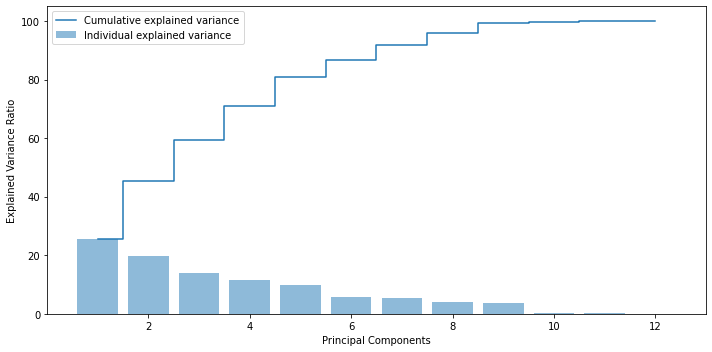

In [121]:

# Plotting the variance expalained by the principal components and the cumulative variance explained.
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [122]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

X_train = pca.fit_transform(X_train_sd)
X_test = pca.transform(X_test_sd)
 

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.25694412 0.19751021]


In [123]:
cov_matrix = np.cov(X_train_sd.T) # the relevanat covariance matrix
print('Covariance Matrix \n%s', cov_matrix)

#generating the eigen values and the eigen vectors
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Covariance Matrix 
%s [[ 1.00549451e+00 -3.52510684e-02  6.70088413e-01  1.93334291e-02
   7.62156645e-02 -8.09817627e-02  3.35100576e-01 -3.34603825e-02
  -2.87104731e-02 -3.21422646e-02  4.85585545e-01  6.96289097e-01]
 [-3.52510684e-02  1.00549451e+00 -2.63563783e-02 -4.14492214e-02
  -1.70158734e-01  2.46554083e-01  5.83281395e-03 -6.13650421e-02
  -2.57588720e-01  2.75833929e-01 -8.51082384e-02 -2.21700548e-02]
 [ 6.70088413e-01 -2.63563783e-02  1.00549451e+00 -1.24162897e-01
  -9.42006694e-04  9.20778504e-02 -3.87876612e-01  2.75471258e-01
   5.04050900e-02  3.97068142e-02  5.30051374e-01  9.79583146e-01]
 [ 1.93334291e-02 -4.14492214e-02 -1.24162897e-01  1.00549451e+00
  -2.33856824e-01 -5.56301161e-01  3.08930519e-02 -9.82084157e-02
  -1.22259794e-01 -4.94076847e-01  1.25624233e-02 -9.31817303e-02]
 [ 7.62156645e-02 -1.70158734e-01 -9.42006694e-04 -2.33856824e-01
   1.00549451e+00 -6.81833492e-01  1.14218461e-01 -4.30295837e-01
  -5.34796430e-02  6.39819294e-02  5.13927413e-02 

In [124]:
# the "cumulative variance explained" analysis 
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 25.69441202  45.44543323  59.48801671  70.89023953  80.75383827
  86.56536164  91.85147553  95.75537628  99.38842334  99.82244194
  99.99740134 100.        ]


In [101]:

# Fitting Logistic Regression To the training set
from sklearn.linear_model import LogisticRegression 
 
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the test set result using
# predict function under LogisticRegression
y_pred = classifier.predict(X_test)
# making confusion matrix between
#  test set of Y and predicted value.
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

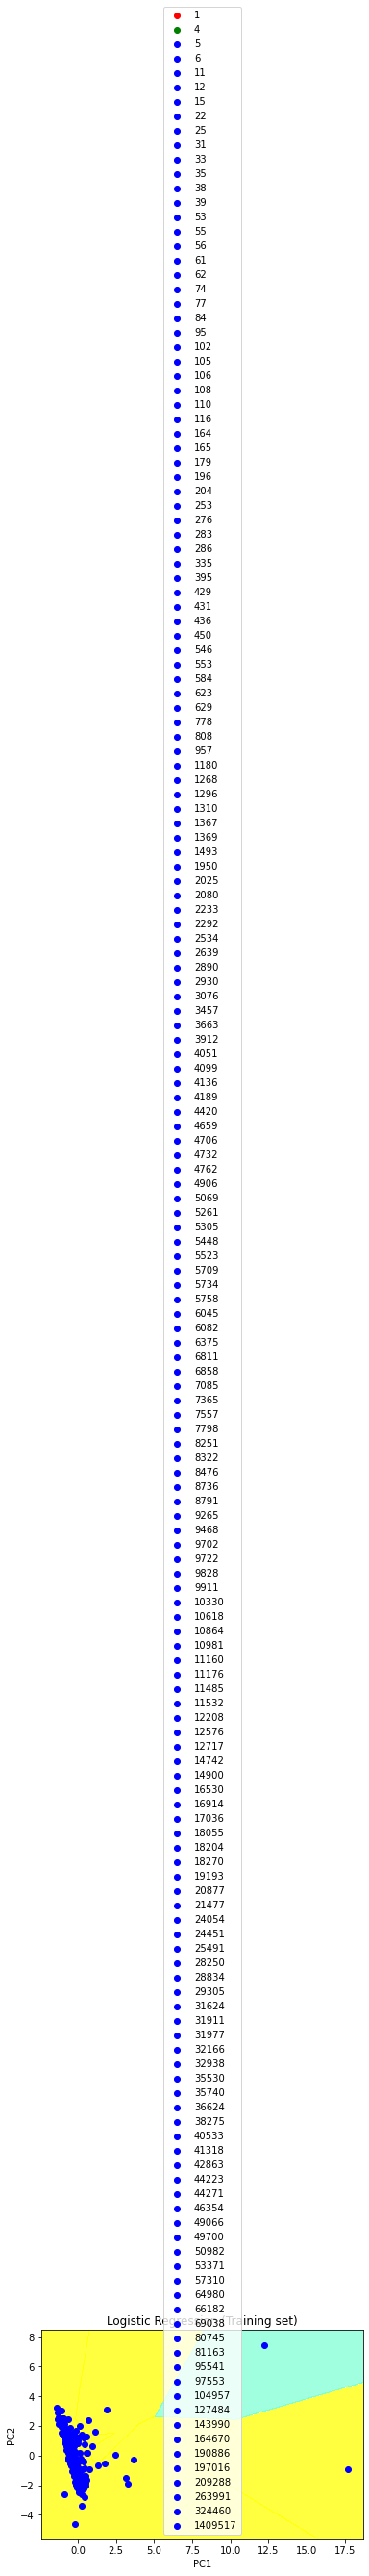

In [105]:
 #Predicting the training set
# result through scatter plot
from matplotlib.colors import ListedColormap
 
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))
 
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))
 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
 
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
 
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend() # to show legend
 
# show scatter plot
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

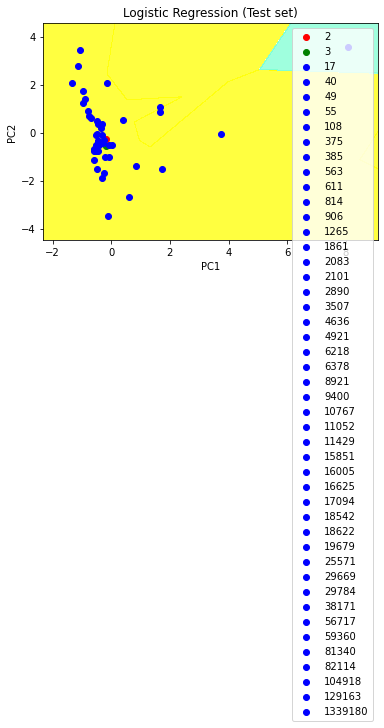

In [104]:
from matplotlib.colors import ListedColormap
 
X_set, y_set = X_test, y_test
 
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))
 
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))
 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
 
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
 
# title for scatter plot
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend()
 
# show scatter plot
plt.show()

In [ ]:

FOR 2 COMPONENTS AS THE DIAGRAM SHOWS OVERFITTING LIKE SCENARIO 
OR CASE WHERE ALL VALUES ONE TYPE OTHER 2 TYPE ARE SINGLE VALUE WHICH IS HARDLY NEGLIGIBLE .

SO 45% DATA IS REFLECTED AND IS SEEN IN 2 CLUSTERS BLUE , RED , GREEN COLORS.


In [85]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(TourDataX_Z)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)



[2.35121616 2.00213154]
[0.21281353 0.18121715]


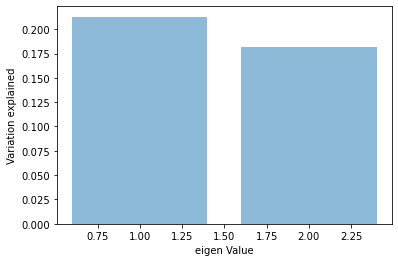

In [87]:
plt.bar(list(range(1,3)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

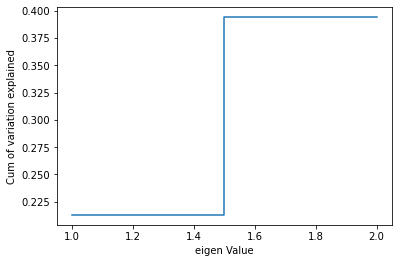

In [88]:
plt.step(list(range(1,3)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()


##AROUND 40 % CUMULATIVE VARINCE EXPLAINED